## Q-Learning

In [1]:
import sys
sys.path.insert(1, 'games/')
from agent import Agent
from connect4 import Connect4, Action
import matplotlib.pyplot as plt
import numpy as np
import platform
if platform.system() == "Darwin":
  %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
def get_policy_score(env, policy, state):
  scores = []
  for action in Action:
    try:
      scores.append((env.action_to_str(action), policy[action][state]))
    except:
      continue
  return scores

In [3]:
agent = Agent(lambda p: Connect4(p), Action, seed=42)

In [4]:
policy = agent.Q_fit_2_players(nb_games=150000)

In [5]:
p1 = Connect4(1)
p2 = Connect4(2)
players = [p1, p2]
player = 0
print(p1.convert_state())
while not p1.is_final_state():
  action = agent.choose_action(players[player], policy[player])
  print(Connect4.action_to_str(action))
  new_state = players[player].get_new_state(action)
  p1.state = new_state
  p2.state = new_state
  print(p1.convert_state())
  player = 1 if player == 0 else 0

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Column no 3
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]
Column no 3
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 1. 0.]]
Column no 4
[[0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 1. 1.]]
Column no 4
[[0. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 1.]]
Column no 3
[[0. 0. 1. 0.]
 [0. 0. 2. 2.]
 [0. 0. 1. 1.]]
Column no 2
[[0. 0. 1. 0.]
 [0. 0. 2. 2.]
 [0. 2. 1. 1.]]
Column no 2
[[0. 0. 1. 0.]
 [0. 1. 2. 2.]
 [0. 2. 1. 1.]]
Column no 4
[[0. 0. 1. 2.]
 [0. 1. 2. 2.]
 [0. 2. 1. 1.]]
Column no 1
[[0. 0. 1. 2.]
 [0. 1. 2. 2.]
 [1. 2. 1. 1.]]
Column no 1
[[0. 0. 1. 2.]
 [2. 1. 2. 2.]
 [1. 2. 1. 1.]]
Column no 2
[[0. 1. 1. 2.]
 [2. 1. 2. 2.]
 [1. 2. 1. 1.]]
Column no 1
[[2. 1. 1. 2.]
 [2. 1. 2. 2.]
 [1. 2. 1. 1.]]


In [33]:
s = tuple(np.array(
             [[0., 1., 0., 1.],
              [0., 2., 2., 2.],
              [2., 1., 1., 1.]]).flatten())
p1 = Connect4(2)
p1.set_state(s)
print(p1.convert_state())
agent.choose_action(p1, policy[1])

[[0. 1. 0. 1.]
 [0. 2. 2. 2.]
 [2. 1. 1. 1.]]


<Action.ONE: 0>

In [34]:
get_policy_score(p1, policy[1], s)

[('Column no 3', -10.0)]

In [8]:
df = agent.policy_to_df(policy[1])
df

,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0)","(0.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0)","(0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0)","(0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0)","(0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0)","(0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0)","(0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0)",...,"(1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0)","(1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0)","(2.0, 1.0, 2.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 2.0, 0.0)","(1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0)","(1.0, 2.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0)","(1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 2.0, 0.0)","(1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 1.0, 2.0, 0.0)","(1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0)","(2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 2.0, 0.0)","(2.0, 1.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0)"
Column no 1,-45.243664,-19.499904,-9998.990001,-10.0,-10.0,-917.663981,-19.499999,-9000.189902,-19.499998,-9001.952509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column no 2,-45.243775,-19.499981,-10.000000,NaN,NaN,-8646.353974,-19.499991,-9000.099910,-19.499999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column no 3,-44.479238,NaN,NaN,NaN,-10.0,-9499.457774,-19.499999,-9000.189902,-19.500000,-28.525000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column no 4,-45.243656,NaN,NaN,NaN,NaN,NaN,NaN,-9000.189902,NaN,-28.533648,...,-10.0,-9.9999,-10.0,-10.0,-9.99999,-10.0,-10.0,-10.0,-9.999,-9.0


### Q-Learning update rule:
$$
Q[s, a] := (1 - \alpha) * Q[s, a] + \alpha * (r + \gamma * max_{a' \in actions} Q[s', a'])
$$

In [4]:
def plot_Q_evolution(game, agent, it_list, path=None):
  plt.figure(dpi=150)
  nb_optimal_moves = 2**N-1
  nb_moves = []
  for it in it_list:
    tmp = []
    for _ in range(5):
      policy = agent.Q_fit(nb_iterations=it)
      tmp.append(game.play(agent, policy, display=False))
    nb_moves.append(np.mean(tmp))
  
  plt.plot(it_list, nb_moves, ".-", color='r', label="Average number of moves found by the agent")
  plt.axhline(nb_optimal_moves, color="orange", label=f"Optimal number of moves = {nb_optimal_moves}")
  plt.xlabel("Number of iterations")
  plt.ylabel("Number of moves")
  plt.title(f"Solving Towers of Hanoï with {N} disks using Q-Learning")
  lgd = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="center")
  if path != None:
    plt.savefig(path, bbox_extra_artists=(lgd,), bbox_inches="tight")


In [5]:
N = 2
agent = Agent(lambda : Hanoi(N), Action, seed=42)

In [6]:
policy = agent.Q_fit(nb_iterations=150)
_ = Hanoi.play(agent, policy)

(0, 0)
LEFT -> MID
(1, 0)
LEFT -> RIGHT
(1, 2)
MID -> RIGHT
(2, 2)
Number of moves: 3


In [7]:
agent.policy_to_df(policy)

,"(0, 0)","(2, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(2, 1)","(1, 2)"
LEFT -> MID,-10.47500,-19.50000,-19.5,-0.5,NaN,NaN,NaN,NaN
LEFT -> RIGHT,-19.95125,NaN,-10.0,10.0,-0.50000,NaN,NaN,NaN
MID -> LEFT,NaN,NaN,NaN,NaN,-19.95125,-19.5,-19.5,-10.000
MID -> RIGHT,NaN,NaN,-10.0,NaN,-19.95125,-19.5,NaN,10.000
RIGHT -> MID,NaN,-10.47500,NaN,-19.5,NaN,NaN,-10.0,NaN
RIGHT -> LEFT,NaN,-19.95125,NaN,NaN,NaN,NaN,-19.5,-10.475


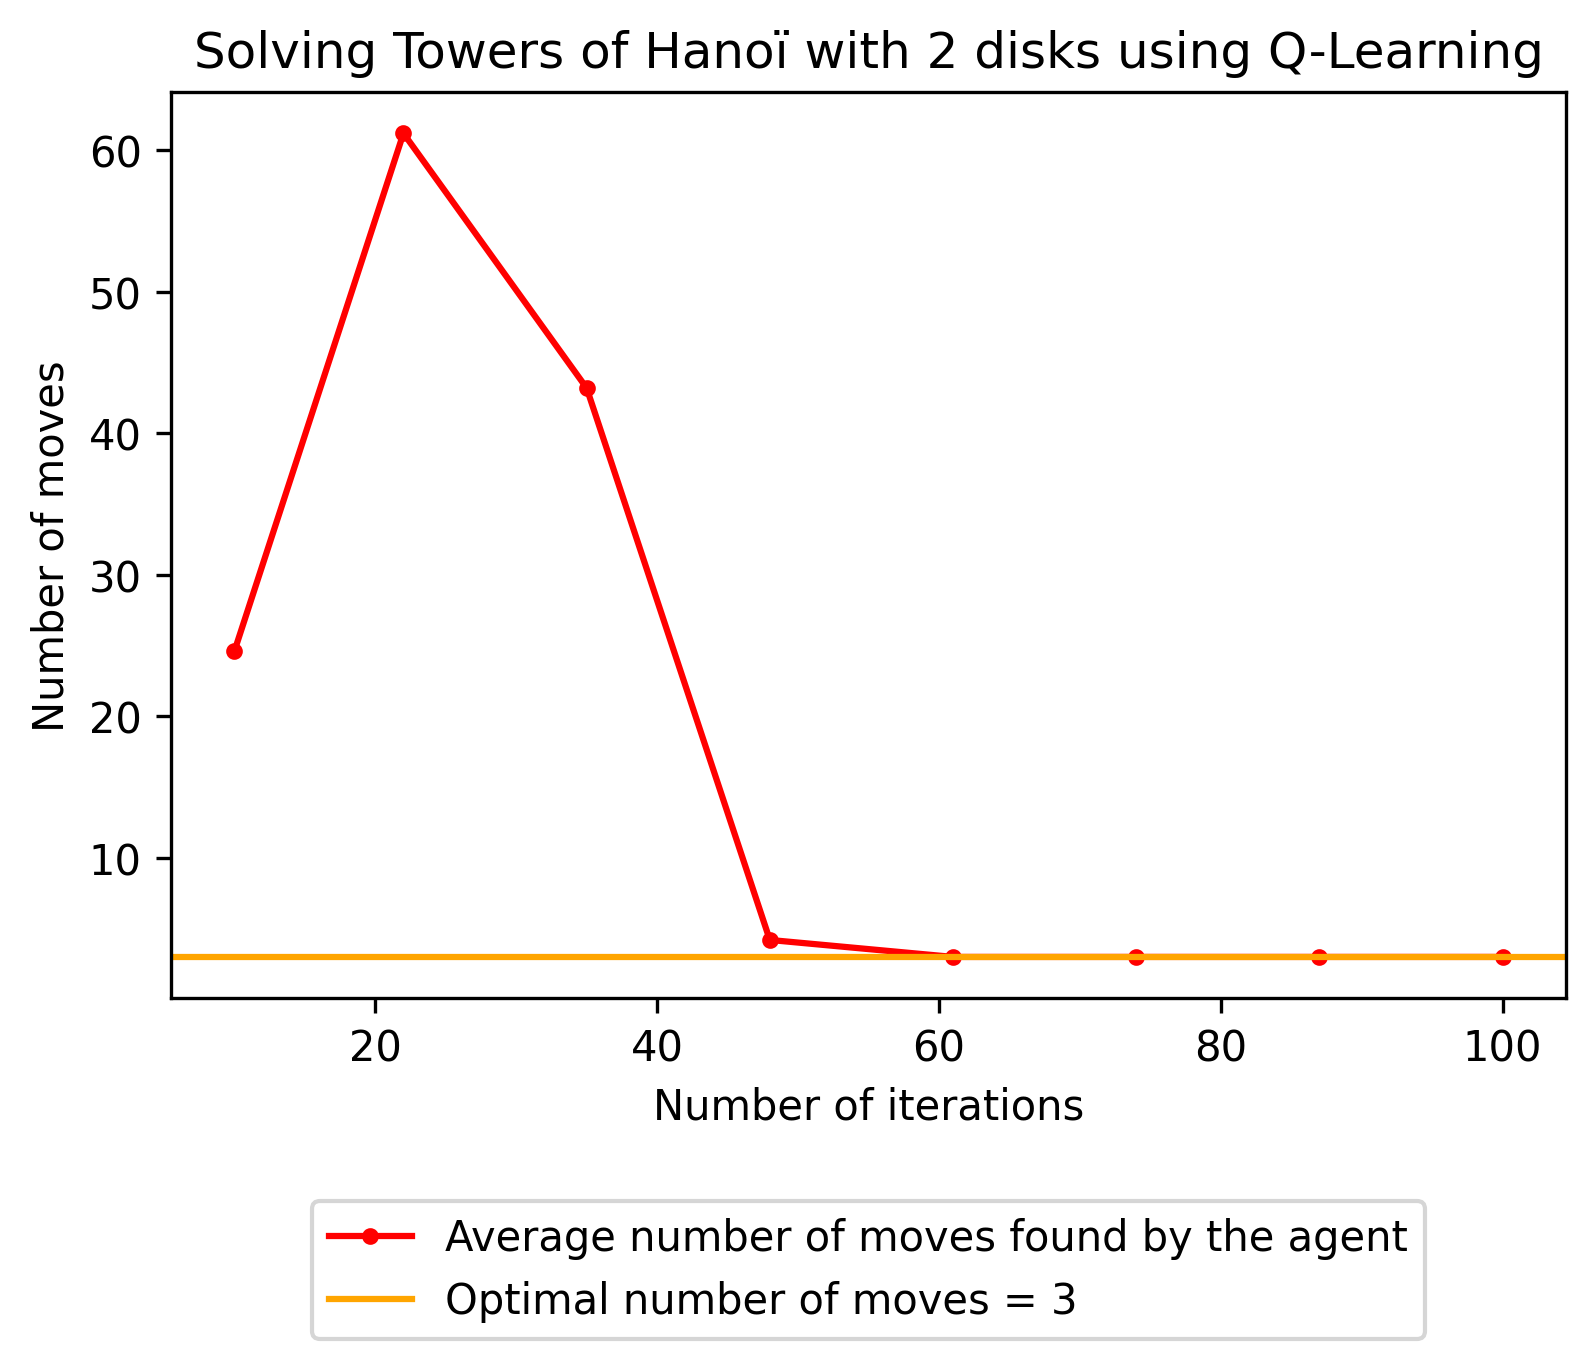

In [8]:
plot_Q_evolution(Hanoi, agent, np.linspace(10, 100, 8, dtype=np.int64))